In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
import math

(array([ 175., 2280., 3216.,  776.,  481.,  494.,  355.,  164.,   46.,
          13.]),
 array([-3.87532468, -2.54428839, -1.2132521 ,  0.11778418,  1.44882047,
         2.77985676,  4.11089305,  5.44192934,  6.77296562,  8.10400191,
         9.4350382 ]),
 <a list of 10 Patch objects>)

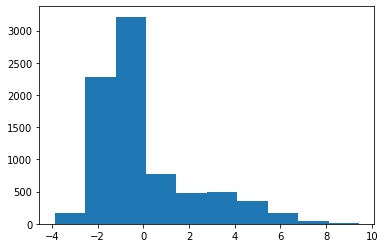

In [3]:
#1.1
N1 = 8000
x1 = np.random.normal(3, scale=2, size= 2000) #%25
x2 = np.random.normal(-1.0, scale=0.8, size= 6000) #%75
x3 = np.hstack((x1,x2)).flatten()
np.random.shuffle(x3)
plt.hist(x3)

for num[1]: miu_c:[2.5160447803689667, -1.168899376569322],
	 var_c:[3.9653029118138083, 0.4638605104799562],
	 alpha_c:[0.31222726021891073, 0.6877727397810893]
	loglikelihoods:-184750.4751617943


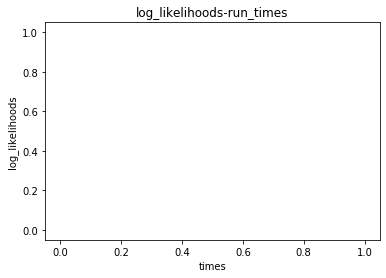

In [4]:
#1.2
#initialize the basic values
log_likelihoods = []
guass_mu = np.array([8.0, -8])
guass_var = np.array([1, 1])
l = np.array([1/2,1/2])
N1 = 8000
run_times = 1
num_gauss = 2    
def guassian(x, mean, cov):
    return np.exp(-0.5*(x-mean)*(x-mean)/cov)/((2*math.pi*cov)**0.5)
for times in range(run_times):
    #initialize the random Gaussians
    gauss_1 = norm(loc=guass_mu[0], scale=guass_var[0]) 
    gauss_2 = norm(loc=guass_mu[1], scale=guass_var[1])
    
    #calculate the probability for each x_i to belongs to gaussians g
    r = np.zeros((len(x3),num_gauss))
    for i in range(len(x3)):
        for j in range(num_gauss):
            r[i][j] = l[j]*guassian(x3[i],guass_mu[j],guass_var[j])
    #calculate log-likelihoods
    sum = 0
    for i in range(len(x3)):
         sum += np.log(np.sum(r,axis=1)[i])
    log_likelihoods.append(sum)
    #Normalize the probabilities such that each row of r sums to 1
    for i in range(len(x3)):
        #r[i] means the i-th line in matrix r
        r[i] = r[i]/np.sum(r,axis=1)[i] 
    
    #M-step
    #calculate m_c
    m_c = []
    for c in range(len(r[0])):
        m = np.sum(r[:,c])
        m_c.append(m)
    
    #calculate pai_c
    pai_c = []
    for i in range(len(r[0])):
        m = np.mean(r[:,i])
        pai_c.append(m)
    l = pai_c
    
    #calculate miu_c
    miu_c = []
    for j in range(len(r[0])):
        n = np.sum(r[:,j]*x3)/m_c[j]
        miu_c.append(n)
    guass_mu = miu_c
    
    #calculate var_c
    var_c = []
    for jj in range(len(r[0])):
        var_c.append((1/m_c[jj])*np.sum((r[:,jj])
                            *(x3-miu_c[jj])*(x3-miu_c[jj])))
    guass_var = var_c
    
print("for num[{}]: miu_c:{},\n\t var_c:{},\n\t alpha_c:{}\n\tloglikelihoods:{}".
                                                                  format(run_times,guass_mu,guass_var, 
                                                                    l,log_likelihoods[run_times-1]))
                                                                               
#plotting log-likelihood
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('log_likelihoods-run_times')
ax1.set_xlabel('times')
ax1.set_ylabel('log_likelihoods')
plt.plot(np.linspace(1,run_times-1,run_times-1), log_likelihoods[1:])

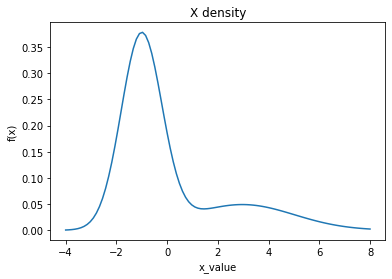

In [307]:
#plotting x density
x = np.linspace(-4,8,100)
p_x = []
for i in range(100):
    p_x.append(l[0]*guassian(x[i],guass_mu[0],guass_var[0])+l[1]*guassian(x[i],guass_mu[1],guass_var[1]));

fig = plt.figure()
ax2 = fig.add_subplot(1, 1, 1)
ax2.set_title('X density')
ax2.set_xlabel('x_value')
ax2.set_ylabel('f(x)')
plt.plot(x,p_x)

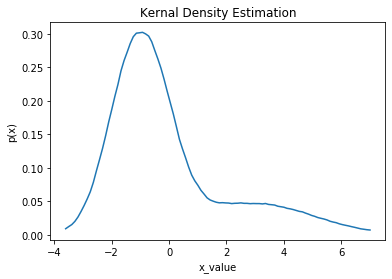

In [49]:
#1.3
N3 = 8000
h1 = 2 #bandwidth
ans = []
bins_nums = 100
def fai(x,xn,h):
    if(((x-xn)/h) < 1/2 and ((x-xn)/h) > -1/2):
        return 1
    else:
        return 0
input = np.linspace(-3.6,7,bins_nums)
for i in range(bins_nums):
    sum = 0
    for j in range(N3):
        sum += fai(input[i],x3[j],h1)
    ans.append(sum/(N3*h1))
#plotting
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Kernal Density Estimation')
ax1.set_xlabel('x_value')
ax1.set_ylabel('p(x)')
plt.plot(input,ans)


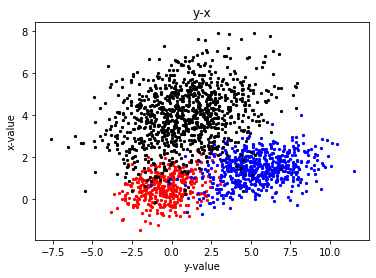

In [171]:
#2.1
N2 = 2000
mu_whole = np.array([[-0.5, 0.5],[5.5, 1.5],[1,4]])
cov1 = np.array([[2,0.3],[0.3, 0.5]])
cov2 = np.array([[4,0.3],[0.3, 0.5]])
cov3 = np.array([[6.0, 1],[1, 2]])
cov_whole = np.array([cov1,cov2,cov3])
a2 = np.array([0.2, 0.3, 0.5])
a3 = [400,600,1000]
Out = []
#the model is 3 by 2
for i in range(3):
    Out.append(np.random.multivariate_normal(mu_whole[i], cov_whole[i], a3[i]))

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('y-x')
ax1.set_xlabel('y-value')
ax1.set_ylabel('x-value')
color = ['r', 'b', 'k']

for i in range(3):
    ax1.scatter(Out[i].T[0],Out[i].T[1],s=20, c=color[i], marker='.')

For runtime:40:
mu1 = [-0.5350819   0.57089718]
mu2 = [5.30931752 1.45418782]
mu3 = [0.90082927 4.0361236 ]
cov1 = [[1.69093957 0.08207417]
 [0.08207417 0.45848478]]
cov2 = [[3.68733098 0.316143  ]
 [0.316143   0.46399638]]
cov3 = [[6.04345851 0.87382355]
 [0.87382355 1.70592495]]
alpha = [0.20470382603267429, 0.3056450029386687, 0.489651171028657]
loglikelihood = -8641.256408942769


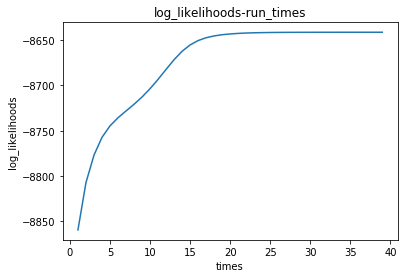

In [317]:
#2.2
def guassian0(x, mean, cov):
    array1 = np.array([x - mean])
    array2 = np.linalg.inv(cov)
    array3 = np.dot(array1, array2)
    array4 = np.dot(array3,array1.T)[0][0]
    return np.exp(-0.5*array4)/(2*math.pi*np.linalg.det(cov)**0.5)


#initialization
miu_1 = np.array([-0.5, 0.5])
miu_2 = np.array([-0.1, 0.34])
miu_3 = np.array([-0.2, 9])
mu_whole1 = np.array([miu_1,miu_2,miu_3])
cov1 = np.array([[2,0.3],[0.3, 0.5]])
cov2 = np.array([[4,0.3],[0.3, 0.5]])
cov3 = np.array([[6.0, 1],[1, 2]])
cov_whole1 = np.array([cov1,cov2,cov3])
alpha = [0.2,0.3,0.5]
run_times = 40
Num_source = 3
R = np.zeros((N2,Num_source))
Sample = np.zeros((N2,2))
likelihood = []
#normalize the sample
y = 1
for y in range(a3[0]):
    Sample[y1] = Out[0][y]
    y1 += 1
for y in range(a3[1]):
    Sample[y1] = Out[1][y]
    y1 += 1
for y in range(a3[2]):
    Sample[y1] = Out[2][y]
    y1 += 1
y1 = 0

for iters in range(run_times):
    #calculate p(xj|theta)
    y1 = 0
    for x in range(3):
        for y in range(N2):
            R[y][x] = alpha[x]*guassian0(Sample[y], mu_whole1[x], cov_whole1[x])

    #calculate the log-likelihood
    sum2 = 0
    for i in range(N2):
        sum2 += np.log(np.sum(R,axis =1)[i])
    likelihood.append(sum2)

    #calculate the p(l|x,theta)
    for i in range(Num_source):
        for j in range(N2):
            R[j] = R[j]/np.sum(R,axis=1)[j]

    #M-step
    #calculate the m_c = add all the p(l|theta)
    m_c0 = []
    for i in range(Num_source):
        m = np.sum(R[:,i])
        m_c0.append(m)

    
    #calculate pai_c
    pai_c0 = []
    for i in range(Num_source):
        m = np.mean(R[:,i])
        pai_c0.append(m)
    alpha = pai_c0
    
    #calculate mu_c
    mu_c0 = []
    summ = [0,0]

    for i in range(Num_source):
        for j in range(N2):
            summ += R[j][i]*Sample[j]
        mu_c0.append(summ/m_c0[i])
        summ = [0,0]
    mu_whole1 = mu_c0

    #calculate cov_c
    cov_c0 = []
    sumv = [[0,0],[0,0]]
    for i in range(Num_source):
        for j in range(N2):
            sumv += R[j][i]*np.dot(np.array([Sample[j]-mu_c0[i]]).T,np.array([Sample[j]-mu_c0[i]]))
        cov_c0.append(sumv/m_c0[i])
        sumv = [[0,0],[0,0]]
    cov_whole1 = cov_c0;

#printing the answer
print('For runtime:{}:\nmu1 = {}\nmu2 = {}\nmu3 = {}\ncov1 = {}\ncov2 = {}\ncov3 = {}\n'
      'alpha = {}\nloglikelihood = {}'.format(run_times,mu_whole1[0],
                                                mu_whole1[1],mu_whole1[2],cov_whole1[0],cov_whole1[1],
                                                        cov_whole1[2],alpha,likelihood[run_times-1]))

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('log_likelihoods-run_times')
ax1.set_xlabel('times')
ax1.set_ylabel('log_likelihoods')
plt.plot(np.linspace(1,run_times-1,run_times-1), likelihood[1:])